### Exercise 0: Dataset preprocessing

#### Convert any non-numeric values to numeric
The dataset has 'x','b','o' character strings. These characters are replaces by numbers. 'b' blank is replaced by 0, 'x' first player is replaced by 1 and 'o' second player is replaced by 2. 

In [387]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
### Load the data into pandas Dataframe

tic_df = pd.read_csv("tic-tac-toe.data", sep=",", header=None)

In [306]:
tic_df.columns = ['tls','tms','trs','mls','mms','mrs','bls','bms','brs','target']
cols = tic_df.columns

In [311]:
## Covert character type to numeric type
tic_df['tls'].replace(to_replace=['b', 'x', 'o'], value=[0, 1, 2], inplace=True)
tic_df['tms'].replace(to_replace=['b', 'x', 'o'], value=[0, 1, 2], inplace=True)
tic_df['trs'].replace(to_replace=['b', 'x', 'o'], value=[0, 1, 2], inplace=True)
tic_df['mls'].replace(to_replace=['b', 'x', 'o'], value=[0, 1, 2], inplace=True)
tic_df['mms'].replace(to_replace=['b', 'x', 'o'], value=[0, 1, 2], inplace=True)
tic_df['mrs'].replace(to_replace=['b', 'x', 'o'], value=[0, 1, 2], inplace=True)
tic_df['bls'].replace(to_replace=['b', 'x', 'o'], value=[0, 1, 2], inplace=True)
tic_df['bms'].replace(to_replace=['b', 'x', 'o'], value=[0, 1, 2], inplace=True)
tic_df['brs'].replace(to_replace=['b', 'x', 'o'], value=[0, 1, 2], inplace=True)

In [312]:
tic_df['target'].replace(to_replace=['positive','negative'], value=[ 1, 0], inplace=True)

In [314]:
tic_df_pos = tic_df[tic_df['target'] == 1]

In [315]:
tic_df_pos.shape

(626, 10)

In [316]:
tic_df_neg = tic_df[tic_df['target'] == 0]

In [317]:
tic_df_neg.shape

(332, 10)

**Dataset is unbalanced, we have got 626 instances for positive category, while only 332 instances for negative
category.** Fraction of positive instances = 626/958 = 0.65. Fraction of negative instances = 332/958 = 0.35

### Stratified Sampling

In [318]:
def strata_sampling(tic_df):
    '''
    Implementation of stratified sampling
    We need 80% (766) of the samples in train set, 20% (192) in test set.
    '''
    train_df = tic_df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.8))
    test_df = tic_df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.2))
    
    return (train_df, test_df)

In [319]:
## stratified sampling
'''
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(tic_df, tic_df["target"]):
    strat_train_x = tic_df.loc[train_index]
    strat_test_x = tic_df.loc[test_index]
'''

def prep_data(train_df, test_df):
    '''
    Preparing train and tests for logistic regression algorithm
    '''
    
    train_y = train_df['target']
    train_df.drop('target', axis=1, inplace=True)

    test_y = test_df['target']
    test_df.drop('target', axis=1, inplace=True)

    X = train_df.to_numpy()
    Y = train_y.to_numpy()

    Y = np.atleast_2d(Y).T

    X_test = test_df.to_numpy()
    Y_test = test_y.to_numpy()

    Y_test = np.atleast_2d(Y_test).T

    X = np.hstack((np.atleast_2d(np.ones(len(X))).T, X))
    X_test = np.hstack((np.atleast_2d(np.ones(len(X_test))).T, X_test))
    
    return (X,Y,X_test,Y_test)

In [320]:
## Execute the functions

(train_df, test_df) = strata_sampling(tic_df)
(X,Y,X_test,Y_test) = prep_data(train_df, test_df)

### Exercise 1 : Logistic Regression with Gradient Ascent 

In [379]:
def learn_logreg_GA(X, Y, X_test, Y_test, step, tmax, params):
    '''
    Implementation of logistic regression with gradient ascent algorithm
    '''
    train_diffs = []
    test_losses = []
    track_steps = [step]
    
    prev_train_loss = np.sum(np.matmul(Y.T,np.matmul(X,params)) - np.log(1+np.exp(np.matmul(X,params))))
    
    for i in range(tmax):
        interm_val = np.matmul(X,params)
        Y_hat = 1/(1+np.exp(-interm_val))
        
        gradient = np.matmul(X.T, (Y - Y_hat))
        
        # Update params
        params = params + step*gradient
        
        # Computing loss after updating params
        train_loss = np.sum(np.matmul(Y.T,np.matmul(X,params)) - np.log(1+np.exp(np.matmul(X,params))))
        
        diff = np.abs(train_loss - prev_train_loss)
        train_diffs.append(diff)
    
        # BOLDDRIVER LOGIC : ADAPTING STEP According to the loss value
        if(train_loss > prev_train_loss):
            step = step/2
        else:
            step = step*1.05
        
        prev_train_loss = train_loss
            
        ## Logloss in test set
        
        test_loss = np.sum(np.matmul(Y_test.T,np.matmul(X_test,params)) - np.log(1+np.exp(np.matmul(X_test,params))))
        
        test_losses.append(test_loss)
        print(step)
    
    print(test_loss)
    return (train_diffs, test_losses, track_steps)

In [380]:
# length of parameter vector
num_param = len(X[0])

# initializing parameter vector
params = np.zeros((num_param,1))

# Intializing steplength: alpha
step = 0.1

# Initializing imax
tmax = 300

**Changing value of steplength with every iteration**

In [381]:
(train_diffs, test_losses, track_steps) = learn_logreg_GA(X, Y, X_test, Y_test, step, tmax, params) 

0.05
0.052500000000000005
0.026250000000000002
0.027562500000000004
0.028940625000000005
0.030387656250000006
0.015193828125000003
0.015953519531250005
0.016751195507812507
0.017588755283203132
0.008794377641601566
0.009234096523681646
0.009695801349865729
0.004847900674932864
0.005090295708679508
0.005344810494113484
0.005612051018819158
0.005892653569760116
0.006187286248248122
0.006496650560660528
0.006821483088693555
0.007162557243128233
0.007520685105284645
0.007896719360548877
0.008291555328576321
0.008706133095005139
0.009141439749755396
0.009598511737243166
0.010078437324105325
0.010582359190310591
0.005291179595155296
0.005555738574913061
0.0027778692874565305
0.0029167627518293573
0.003062600889420825
0.0032157309338918666
0.0016078654669459333
0.0016882587402932301
0.0017726716773078918
0.0008863358386539459
0.0009306526305866433
0.0009771852621159754
0.0010260445252217743
0.001077346751482863
0.001131214089057006
0.0011877747935098565
0.0012471635331853493
0.001309521709844

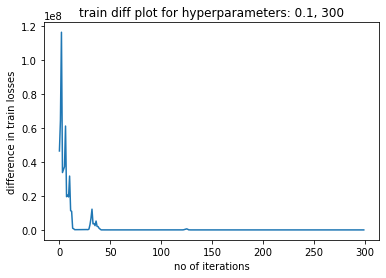

In [324]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(step)+", "+str(tmax))
plt.show()

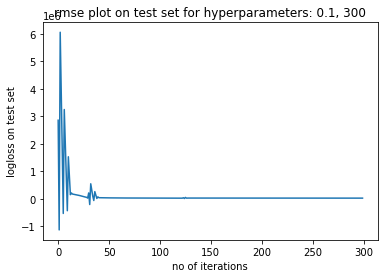

In [325]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("logloss on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(step)+", "+str(tmax))
plt.show()

### Exercise 2: Implement Newton Algorithm for Logistic Regression

In [382]:
def learn_logreg_newton(X, Y, X_test, Y_test, step, tmax, params):
    '''
    Implementation of logistic regression with Newton algorithm
    '''
    
    train_diffs = []
    test_losses = []

    
    prev_train_loss = np.sum(np.matmul(Y.T,np.matmul(X,params)) - np.log(1+np.exp(np.matmul(X,params))))
    
    for i in range(tmax):
        interm_val = np.matmul(X,params)
        Y_hat = 1/(1+np.exp(-interm_val))
        
        gradient = np.matmul(X.T, (Y - Y_hat))
        
        #Compute Hessian 
        W = np.diagflat(interm_val * (1-interm_val))
        hessian = -np.matmul(X.T, np.matmul(W,X) )
        
        # Update params
        params = params + step*np.matmul(np.linalg.inv(hessian), gradient)
        
        
        # Computing loss after updating params
        train_loss = np.sum(np.matmul(Y.T,np.matmul(X,params)) - np.log(1+np.exp(np.matmul(X,params))))
        
        diff = np.abs(train_loss - prev_train_loss)
        train_diffs.append(diff)
        
        # BOLDDRIVER LOGIC : ADAPTING STEP According to the loss value
        if(train_loss > prev_train_loss):
            step = step/2
        else:
            step = step*1.05
        
        prev_train_loss = train_loss
            
        ## Logloss in test set
        
        test_loss = np.sum(np.matmul(Y_test.T,np.matmul(X_test,params)) - np.log(1+np.exp(np.matmul(X_test,params))))
        
        test_losses.append(test_loss)
        print(step)
        
    print("logloss on test set in last iteration::", test_loss)
    return (train_diffs, test_losses)

In [383]:
# length of parameter vector
num_param = len(X[0])

# initializing parameter vector
params = np.ones((num_param,1))

# Intializing steplength: alpha
step = 0.5

# Initializing imax
tmax = 122

**"The changing values of steplength with every iteration::**

In [384]:
(train_diffs, test_losses) = learn_logreg_newton(X, Y, X_test, Y_test, step, tmax, params) 


0.525
0.55125
0.5788125000000001
0.6077531250000001
0.6381407812500002
0.6700478203125002
0.7035502113281252
0.7387277218945315
0.7756641079892581
0.814447313388721
0.8551696790581571
0.897928163011065
0.9428245711616183
0.9899657997196993
1.0394640897056844
1.0914372941909687
1.1460091589005172
1.203309616845543
1.2634750976878202
1.3266488525722113
1.392981295200822
1.4626303599608632
1.5357618779589064
1.612549971856852
1.6931774704496945
1.7778363439721792
1.8667281611707882
1.9600645692293277
2.058067797690794
2.160971187575334
2.269019746954101
2.382470734301806
2.5015942710168964
2.6266739845677414
2.7580076837961287
2.8959080679859355
3.0407034713852323
3.192738644954494
3.352375577202219
3.51999435606233
3.6959940738654464
3.880793777558719
4.0748334664366554
4.278575139758488
4.492503896746413
4.717129091583734
4.952985546162921
5.200634823471067
5.460666564644621
5.733699892876852
6.020384887520695
6.32140413189673
6.637474338491567
6.9693480554161455
7.317815458186953
7.683

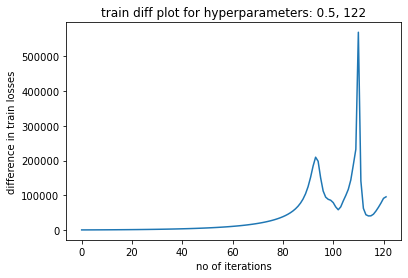

In [385]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(step)+", "+str(tmax))
plt.show()

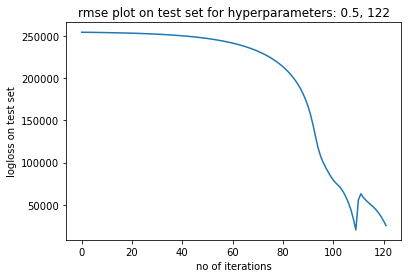

In [386]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("logloss on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(step)+", "+str(tmax))
plt.show()

#### Comment on convergence: Newton's algorithm converges with increasing steplength with every iteration. While, with gradient ascent, we used learning rate decreases with every iteration.